In [1]:
import json
import pickle
import numpy as np
import jax.numpy as jnp
import stim


import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Results from Table 1

Change n,k,d accordingly and uncomment the different graph types

bell = 1 only for d=5 codes (0 otherwise)

In [2]:
n = 25
k = 1
d = 5
graph = 'NN-1'
graph = 'NN-2'
# graph = 'All-to-All'
bell = 0

# - d = 3 - #
# 15, 10, 9
# 19, 11, 10
# 38, 23, 16
# - d = 4 - #
# 38, 26, 18
# 65, 37, 24
# 141, 75, 37 
# - d = 5 - #
# 98, 61, 31
# 123, 78, 37
# 117, 70, 37

directory_path = "../results/%d-%d-%d-%s" % (n,k,d,graph) 

with open(directory_path+'/data-%s-%d.json' % (graph,bell), 'rb') as file:
    codes = json.load(file)
with open(directory_path+'/config-%s-%d.json' % (graph,bell), 'rb') as file:
    config = json.load(file)

print(min([len(codes[i]['gates']) - (n-k)//2 for i in range(8)]), 
      [len(codes[i]['gates']) - (n-k)//2 for i in range(8)])

70 [72, 72, 73, 78, 74, 72, 71, 70]


## Run following cell for compute time spent on a Quadro RTX 6000 GPU

In [3]:
config['TIME']

5135.60204202123

In [7]:
n = 25
k = 1
d = 5
connectivity = "NN-2"
bell = 0

with open('../results/%d-%d-%d-%s/returns-%s-%d.p' % (n,k,d,connectivity,connectivity,bell), 'rb') as file:
    returns_0 = pickle.load(file)

with open('../results/%d-%d-%d-%s/lengths-%s-%d.p' % (n,k,d,connectivity,connectivity,bell), 'rb') as file:
    lengths_0 = pickle.load(file)

with open('../results/%d-%d-%d-%s/config-%s-%d.json' % (n,k,d,connectivity,connectivity,bell), 'rb') as file:
    config_0 = json.load(file)

bell = 1

with open('../results/%d-%d-%d-%s/returns-%s-%d.p' % (n,k,d,connectivity,connectivity,bell), 'rb') as file:
    returns_1 = pickle.load(file)

with open('../results/%d-%d-%d-%s/lengths-%s-%d.p' % (n,k,d,connectivity,connectivity,bell), 'rb') as file:
    lengths_1 = pickle.load(file)

with open('../results/%d-%d-%d-%s/config-%s-%d.json' % (n,k,d,connectivity,connectivity,bell), 'rb') as file:
    config_1 = json.load(file)

# Compare Bell vs no Bell

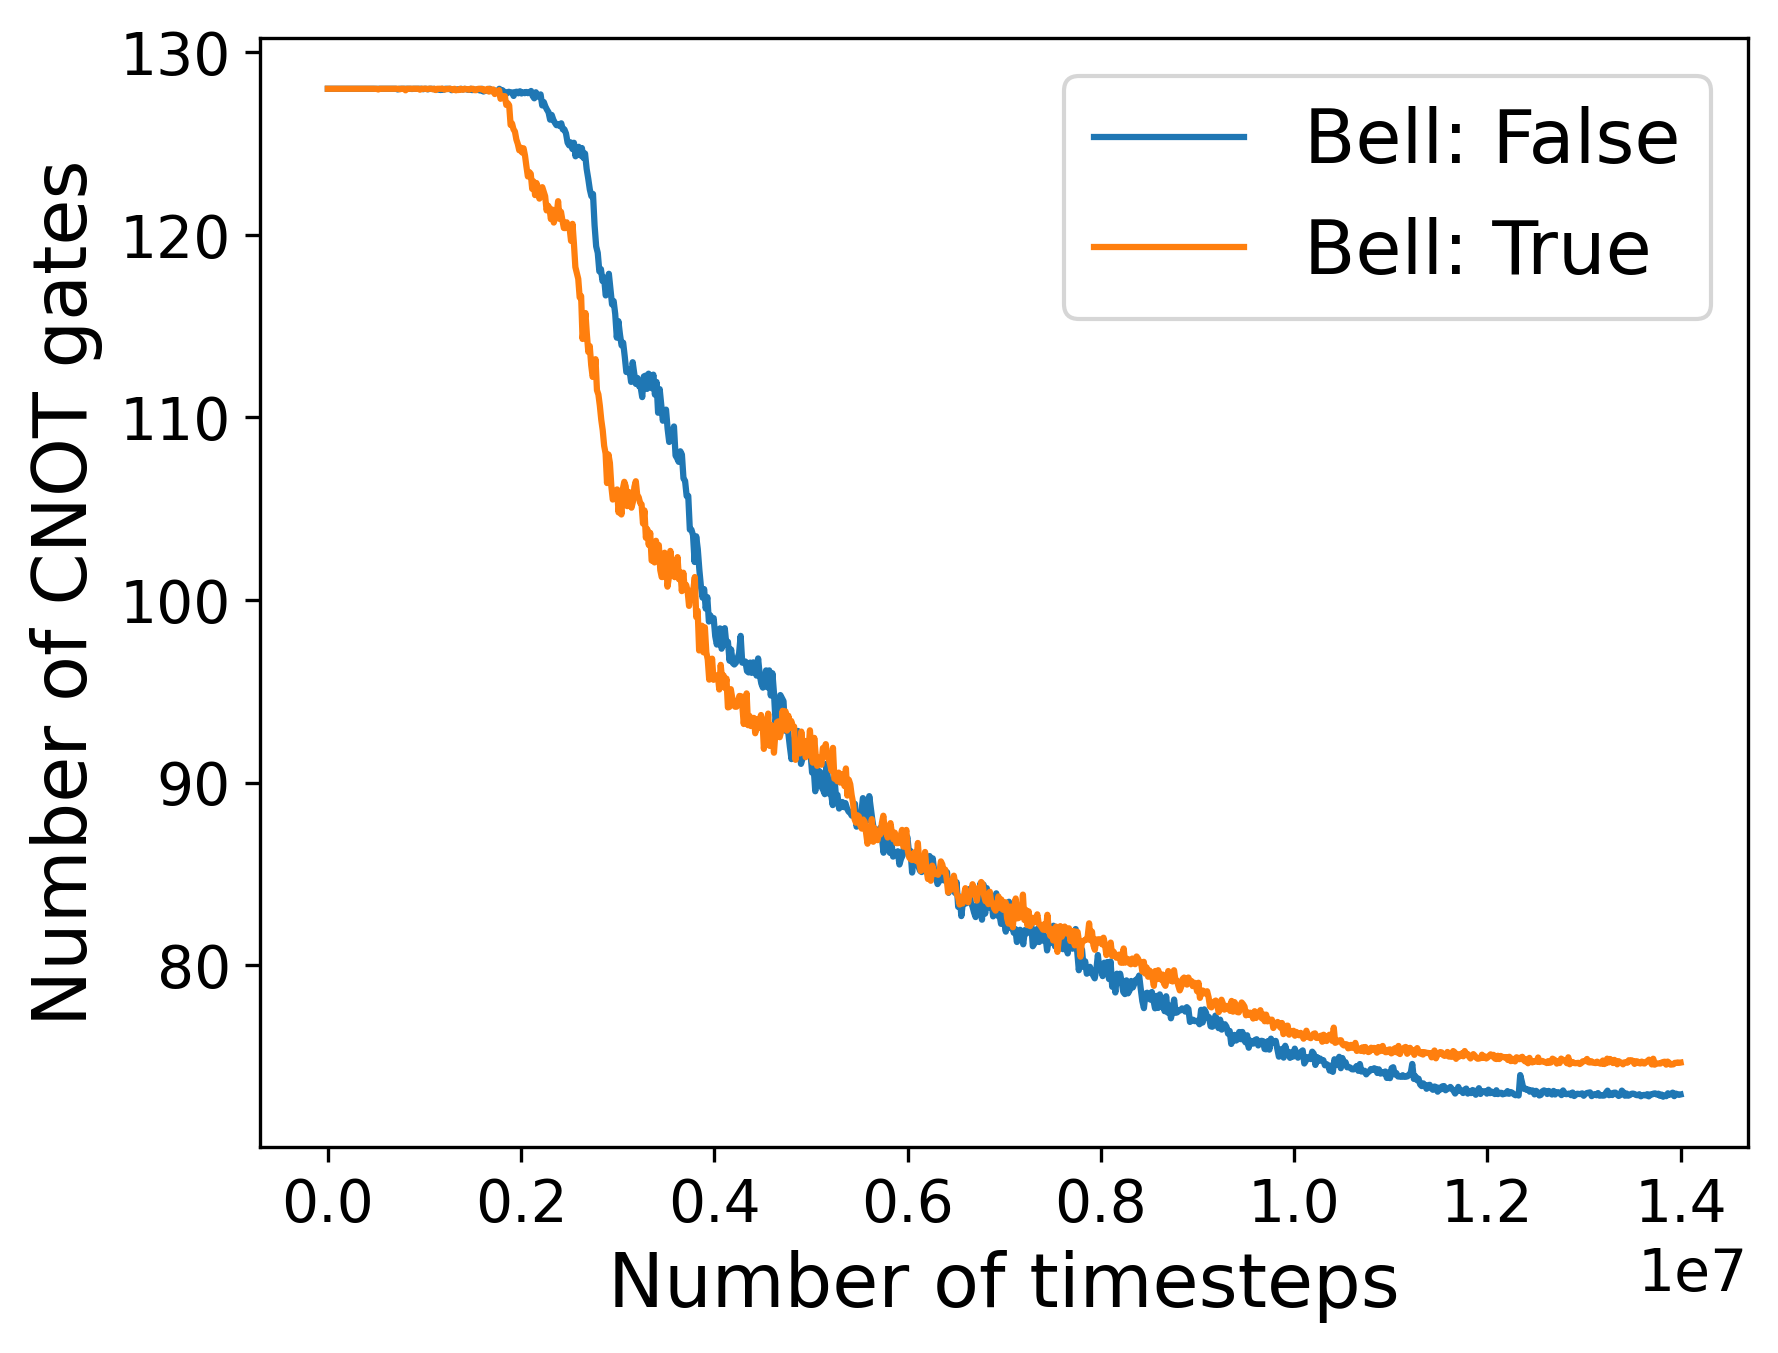

In [9]:
x0 = np.linspace(0, config_0["TOTAL_TIMESTEPS"], len(returns_0[0]))
x1 = np.linspace(0, config_1["TOTAL_TIMESTEPS"], len(returns_1[0]))


from matplotlib import rc
# rc('text', usetex=True)
rc('xtick', labelsize=14)
rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 18})
# plt.rcParams.update({"pgf.texsystem": "pdflatex"})
plt.rcParams.update({'figure.dpi': 300})

fig = plt.figure()
plt.plot(x0, np.mean(np.array(lengths_0), axis=0), label='Bell: False')
plt.plot(x1, np.mean(np.array(lengths_1), axis=0)+ (n-k)//2, label='Bell: True')

plt.xlabel("Number of timesteps")
plt.ylabel("Number of CNOT gates")
plt.legend()
plt.show() 

In [10]:
fig.savefig('25_1_5_bell_vs_no_bell_NN-2.pdf')